In [1]:
from fastlane_bot.bot import CarbonBot as Bot#, Config, ConfigDB, ConfigNetwork, ConfigProvider
from fastlane_bot.tools.cpc import ConstantProductCurve as CPC, CPCContainer, T, Pair
from fastlane_bot.tools.analyzer import CPCAnalyzer
from fastlane_bot.tools.optimizer import SimpleOptimizer, MargPOptimizer, ConvexOptimizer
from fastlane_bot.tools.arbgraphs import ArbGraph
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPC))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPCAnalyzer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(SimpleOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(MargPOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(ConvexOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(ArbGraph))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(Bot))
from fastlane_bot.testing import *
import itertools as it
import collections as cl
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [12,6]
from fastlane_bot import __VERSION__
require("3.0", __VERSION__)

Using default database url, if you want to use a different database, set the backend_url found at the bottom of manager_base.py
Error adding Ethereum blockchain to database Ethereum, (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "ix_blockchains_name"
DETAIL:  Key (name)=(Ethereum) already exists.

[SQL: INSERT INTO blockchains (name, block_number) VALUES (%(name)s, %(block_number)s) RETURNING blockchains.id]
[parameters: {'name': 'Ethereum', 'block_number': 0}]
(Background on this error at: http://sqlalche.me/e/14/gkpj) skipping...
Error adding exchange carbon_v1 to database, (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "exchanges_pkey"
DETAIL:  Key (id)=(6) already exists.

[SQL: INSERT INTO exchanges (id, name, blockchain_name) VALUES (%(id)s, %(name)s, %(blockchain_name)s)]
[parameters: {'id': 6, 'name': 'carbon_v1', 'blockchain_name': 'Ethereum'}]
(Background on this error at: http://sqlalche.me/e/14/gkpj) skipp

# Mainnet Arbitrage Dashboard [A014]

In [2]:
# bot     = Bot()
# CCm     = bot.get_curves()
# fn = f"../data/A014-{int(time.time())}.csv.gz"
# print (f"Saving as {fn}")
# CCm.asdf().to_csv(fn, compression = "gzip")

In [3]:
!ls ../data

A014-1683963279.csv.gz A014-1683963346.csv.gz A014-1683963372.csv.gz


In [4]:
CCm     = CPCContainer.from_df(pd.read_csv("../data/A014-1683963372.csv.gz"))
CCu3    = CCm.byparams(exchange="uniswap_v3")
CCu2    = CCm.byparams(exchange="uniswap_v2")
CCs2    = CCm.byparams(exchange="sushiswap_v2")
CCc1    = CCm.byparams(exchange="carbon_v1")
tc_u3   = CCu3.token_count(asdict=True)
tc_u2   = CCu2.token_count(asdict=True)
tc_s2   = CCs2.token_count(asdict=True)
tc_c1   = CCc1.token_count(asdict=True)
CAm     = CPCAnalyzer(CCm)

## Market structure analysis

In [5]:
CA = CAm
pairs0  = CA.CC.pairs(standardize=False)
pairs   = CA.pairs()
pairsc  = CA.pairsc()
tokens  = CA.tokens()

In [6]:
print(f"Total pairs:    {len(pairs0):4}")
print(f"Primary pairs:  {len(pairs):4}")
print(f"...carbon:      {len(pairsc):4}")
print(f"Tokens:         {len(CA.tokens()):4}")
print(f"Curves:         {len(CCm):4}")

Total pairs:      45
Primary pairs:    28
...carbon:        26
Tokens:           23
Curves:           97


In [7]:
CA.count_by_pairs()

,count
pair,
WETH-6Cc2/USDC-eB48,19
BNT-FF1C/vBNT-7f94,10
BNT-FF1C/WETH-6Cc2,10
USDT-1ec7/USDC-eB48,6
CRV-cd52/USDC-eB48,3
stETH-fE84/WETH-6Cc2,3
DAI-1d0F/USDC-eB48,3
DAI-1d0F/USDT-1ec7,3
WBTC-C599/USDC-eB48,3


In [8]:
CA.count_by_pairs(minn=2)

,count
pair,
WETH-6Cc2/USDC-eB48,19
BNT-FF1C/vBNT-7f94,10
BNT-FF1C/WETH-6Cc2,10
USDT-1ec7/USDC-eB48,6
CRV-cd52/USDC-eB48,3
stETH-fE84/WETH-6Cc2,3
DAI-1d0F/USDC-eB48,3
DAI-1d0F/USDT-1ec7,3
WBTC-C599/USDC-eB48,3


## Carbon

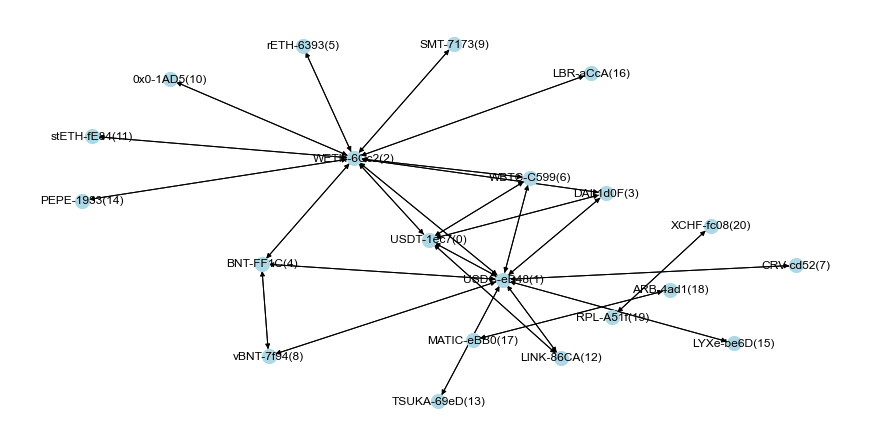

In [9]:
ArbGraph.from_cc(CCc1).plot()._

In [10]:
len(CCc1), len(CCc1.tokens())

(75, 21)

In [11]:
CCc1.token_count()

[('WETH-6Cc2', 41),
 ('USDC-eB48', 35),
 ('BNT-FF1C', 20),
 ('USDT-1ec7', 12),
 ('vBNT-7f94', 10),
 ('DAI-1d0F', 5),
 ('WBTC-C599', 5),
 ('LINK-86CA', 3),
 ('CRV-cd52', 2),
 ('0x0-1AD5', 2),
 ('stETH-fE84', 2),
 ('PEPE-1933', 2),
 ('MATIC-eBB0', 2),
 ('ARB-4ad1', 2),
 ('rETH-6393', 1),
 ('SMT-7173', 1),
 ('TSUKA-69eD', 1),
 ('LYXe-be6D', 1),
 ('LBR-aCcA', 1),
 ('RPL-A51f', 1),
 ('XCHF-fc08', 1)]

In [12]:
len(CCc1.pairs()), CCc1.pairs()

(26,
 {'0x0-1AD5/WETH-6Cc2',
  'ARB-4ad1/MATIC-eBB0',
  'BNT-FF1C/USDC-eB48',
  'BNT-FF1C/WETH-6Cc2',
  'BNT-FF1C/vBNT-7f94',
  'CRV-cd52/USDC-eB48',
  'DAI-1d0F/USDC-eB48',
  'DAI-1d0F/USDT-1ec7',
  'LBR-aCcA/WETH-6Cc2',
  'LINK-86CA/USDC-eB48',
  'LINK-86CA/USDT-1ec7',
  'LYXe-be6D/USDC-eB48',
  'PEPE-1933/WETH-6Cc2',
  'RPL-A51f/XCHF-fc08',
  'SMT-7173/WETH-6Cc2',
  'TSUKA-69eD/USDC-eB48',
  'USDT-1ec7/USDC-eB48',
  'WBTC-C599/USDC-eB48',
  'WBTC-C599/USDT-1ec7',
  'WBTC-C599/WETH-6Cc2',
  'WETH-6Cc2/DAI-1d0F',
  'WETH-6Cc2/USDC-eB48',
  'WETH-6Cc2/USDT-1ec7',
  'rETH-6393/WETH-6Cc2',
  'stETH-fE84/WETH-6Cc2',
  'vBNT-7f94/USDC-eB48'})

## All pairs

In [13]:
pairsc=list(CAm.pairsc())
pairsc.sort()
pairsc += ["==/==", f"{T.WETH}/{T.USDC}", f"{T.WBTC}/{T.USDC}", f"{T.USDT}/{T.USDC}", "BNT-FF1C/vBNT-7f94"]
for pair in pairsc:
    pi = CA.pair_data(pair)
    O = MargPOptimizer(pi.CC)
    tkn0, tkn1 = pair.split("/")
    
    try:
        r0 = O.margp_optimizer(tkn0, params=dict(verbose=False, debug=False))
        r0.trade_instructions(ti_format=O.TIF_DFAGGR8)
        r00 = r0.result or 0

        r1 = O.margp_optimizer(tkn1, params=dict(verbose=False, debug=False))
        r11 = r1.result or 0
        r1.trade_instructions(ti_format=O.TIF_DFAGGR8)

        print(f"{Pair.n(pair):12}- {-r00:12.4f} {tkn0:10} {-r11:12.4f} {tkn1:10}")
    except Exception as e:
        print(f"{Pair.n(pair):12}-")

0x0/WETH    -
ARB/MATIC   -
BNT/USDC    -       0.0000 BNT-FF1C         0.0000 USDC-eB48 
BNT/WETH    -       0.4118 BNT-FF1C         0.0001 WETH-6Cc2 
BNT/vBNT    -       6.5407 BNT-FF1C         9.2424 vBNT-7f94 
CRV/USDC    -       0.1864 CRV-cd52         0.1519 USDC-eB48 
DAI/USDC    -       0.0000 DAI-1d0F         0.0000 USDC-eB48 
DAI/USDT    -       0.0000 DAI-1d0F         0.0000 USDT-1ec7 
LBR/WETH    -       0.0000 LBR-aCcA         0.0000 WETH-6Cc2 
LINK/USDC   -       0.0000 LINK-86CA       -0.0000 USDC-eB48 
LINK/USDT   -       0.0030 LINK-86CA        0.0197 USDT-1ec7 
LYXe/USDC   -       0.0000 LYXe-be6D       -0.0000 USDC-eB48 
PEPE/WETH   -
RPL/XCHF    -       0.0000 RPL-A51f         0.0000 XCHF-fc08 
SMT/WETH    -      -0.0000 SMT-7173         0.0000 WETH-6Cc2 
TSUKA/USDC  -       0.0000 TSUKA-69eD       0.0000 USDC-eB48 
USDT/USDC   -       0.4763 USDT-1ec7        0.4772 USDC-eB48 
WBTC/USDC   -       0.0000 WBTC-C599      -42.4091 USDC-eB48 
WBTC/USDT   -      -0.0000 W

## Analysis by pair

In [14]:
pricedf = CAm.pool_arbitrage_statistics()
pricedf

price            vl itm  b  s  \
pair       exchange   cid0                                         
0x0/WETH   carbon_v1  132277-0  0.000013  1.342084e+04      b      
                      132277-1  0.000015  3.597323e+02         s   
ARB/MATIC  carbon_v1  806240-1  1.428571  1.418060e+02      b      
                      806240-0  1.507045  1.276054e+01         s   
BNT/USDC   bancor_v3  720       0.416156  5.373193e+06      b  s   
...                                  ...           ...  .. .. ..   
rETH/WETH  carbon_v1  903115-0  1.072000  1.865671e+00      b      
stETH/WETH carbon_v1  422914-1  0.990099  8.011450e-02      b      
           uniswap_v2 ff7abe20  0.994518  2.541959e+03      b  s   
           carbon_v1  422914-0  1.010101  2.031521e-03         s   
vBNT/USDC  carbon_v1  171896-1  0.390000  5.000000e+03         s   

                                                                 bsv  
pair       exchange   cid0                                            
0x0/WETH   carbon_v1  132277-0           buy-0x0 @ 0.00 WETH per 0x0  
                      132277-1          sell-0x0 @ 0.00 WETH per 0x0  
ARB/MATIC  carbon_v1  806240-1          buy-ARB @ 1.43 MATIC per ARB  
                      806240-0         sell-ARB @ 1.51 MATIC per ARB  
BNT/USDC   bancor_v3  720           buy-sell-BNT @ 0.42 USDC per BNT  
...                                                              ...  
rETH/WETH  carbon_v1  903115-0         buy-rETH @ 1.07 WETH per rETH  
stETH/WETH carbon_v1  422914-1       buy-stETH @ 0.99 WETH per stETH  
           uniswap_v2 ff7abe20  buy-sell-stETH @ 0.99 WETH per stETH  
           carbon_v1  422914-0      sell-stETH @ 1.01 WETH per stETH  
vBNT/USDC  carbon_v1  171896-1        sell-vBNT @ 0.39 USDC per vBNT  

[95 rows x 6 columns]

### WETH/USDC

In [15]:
pair = "WETH-6Cc2/USDC-eB48"
print(f"Pair = {pair}")

Pair = WETH-6Cc2/USDC-eB48


In [16]:
df = pricedf.loc[Pair.n(pair)]
df

price          vl itm  b  s  \
exchange   cid0                                          
carbon_v1  057306-0  1405.000140    3.558719      b      
           057334-0  1700.000170    0.029412      b      
           057331-0  1747.325134    2.728833      b      
           057337-0  1798.680977    0.890116      b      
           057339-0  1800.000000    0.000556      b      
uniswap_v3 76b13aa0  1802.410822  523.671415   x  b  s   
carbon_v1  057292-0  1853.408818    0.003314   x  b      
           057353-0  1853.999815    0.004235   x  b      
           057296-0  1929.999807    0.001033   x  b      
           057299-1  1940.000000    0.026117         s   
           057296-1  1949.999805   10.460391         s   
           057337-1  1975.000000    0.218712         s   
           057343-1  1989.999801    1.000000         s   
           057334-1  1999.999800    0.040000         s   
           057331-1  2000.000000    2.950064         s   
           057292-1  2000.000000    0.016387         s   
           057353-1  2047.999795    8.230465         s   
           057285-1  2099.999790    0.006040         s   
           057315-1  2300.000000    0.487950         s   

                                                       bsv  
exchange   cid0                                             
carbon_v1  057306-0       buy-WETH @ 1405.00 USDC per WETH  
           057334-0       buy-WETH @ 1700.00 USDC per WETH  
           057331-0       buy-WETH @ 1747.33 USDC per WETH  
           057337-0       buy-WETH @ 1798.68 USDC per WETH  
           057339-0       buy-WETH @ 1800.00 USDC per WETH  
uniswap_v3 76b13aa0  buy-sell-WETH @ 1802.41 USDC per WETH  
carbon_v1  057292-0       buy-WETH @ 1853.41 USDC per WETH  
           057353-0       buy-WETH @ 1854.00 USDC per WETH  
           057296-0       buy-WETH @ 1930.00 USDC per WETH  
           057299-1      sell-WETH @ 1940.00 USDC per WETH  
           057296-1      sell-WETH @ 1950.00 USDC per WETH  
           057337-1      sell-WETH @ 1975.00 USDC per WETH  
           057343-1      sell-WETH @ 1990.00 USDC per WETH  
           057334-1      sell-WETH @ 2000.00 USDC per WETH  
           057331-1      sell-WETH @ 2000.00 USDC per WETH  
           057292-1      sell-WETH @ 2000.00 USDC per WETH  
           057353-1      sell-WETH @ 2048.00 USDC per WETH  
           057285-1      sell-WETH @ 2100.00 USDC per WETH  
           057315-1      sell-WETH @ 2300.00 USDC per WETH

In [17]:
pi = CA.pair_data(pair)
O = MargPOptimizer(pi.CC)

#### Target token = base token

In [18]:
targettkn = pair.split("/")[0]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

Target token = WETH-6Cc2


,USDC-eB48,WETH-6Cc2
a176b13aa0,1.598698e+01,-0.008870
41057296-0,-1.994537e+00,0.001033
41057292-0,-6.141325e+00,0.003317
41057353-0,-7.851120e+00,0.004235
PRICE,5.548124e-04,1.000000
AMMIn,1.598698e+01,0.008585
AMMOut,-1.598698e+01,-0.008870
TOTAL NET,5.655329e-08,-0.000285


In [19]:
dfti1 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti1['gain_ttkn']):.4f} {targettkn}")
dfti1

Total gain: 0.0003 WETH-6Cc2


fee       pair  amt_tknq       tknq       margp0  \
exch       cid                                                              
uniswap_v3 a176b13aa0  0.003  USDC/WETH -0.008870  WETH-6Cc2     0.000555   
carbon_v1  41057353-0  0.002  WETH/USDC -7.851120  USDC-eB48  1853.999815   
           41057292-0  0.002  WETH/USDC -6.141325  USDC-eB48  1853.408818   
           41057296-0  0.002  WETH/USDC -1.994537  USDC-eB48  1929.999807   

                              effp        margp        gain_r     gain_tknq  \
exch       cid                                                                
uniswap_v3 a176b13aa0     0.000555     0.000555  5.316072e-08  4.715237e-10   
carbon_v1  41057353-0  1853.999391  1802.411005  2.862188e-02  2.247138e-01   
           41057292-0  1851.703624  1802.411005  2.734816e-02  1.679539e-01   
           41057296-0  1929.997779  1802.411005  7.078673e-02  1.411868e-01   

                          gain_ttkn  
exch       cid                       
uniswap_v3 a176b13aa0  4.715237e-10  
carbon_v1  41057353-0  1.246740e-04  
           41057292-0  9.318292e-05  
           41057296-0  7.833217e-05

#### Target token = quote token

In [20]:
targettkn = pair.split("/")[1]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

Target token = USDC-eB48


,USDC-eB48,WETH-6Cc2
a176b13aa0,15.473184,-8.584715e-03
41057296-0,-1.994537,1.033440e-03
41057292-0,-6.141325,3.316581e-03
41057353-0,-7.851120,4.234694e-03
PRICE,1.000000,1.802411e+03
AMMIn,15.473184,8.584715e-03
AMMOut,-15.986982,-8.584715e-03
TOTAL NET,-0.513798,1.056533e-11


In [21]:
dfti2 = r.trade_instructions(ti_format=O.TIF_DFPG8)
#print(f"Total gain: {sum(dfti2['gain_ttkn']):.4f}", targettkn)
dfti2

fee       pair  amt_tknq       tknq       margp0  \
exch       cid                                                              
uniswap_v3 a176b13aa0  0.003  USDC/WETH -0.008585  WETH-6Cc2     0.000555   
carbon_v1  41057353-0  0.002  WETH/USDC -7.851120  USDC-eB48  1853.999815   
           41057292-0  0.002  WETH/USDC -6.141325  USDC-eB48  1853.408818   
           41057296-0  0.002  WETH/USDC -1.994537  USDC-eB48  1929.999807   

                              effp        margp        gain_r     gain_tknq  \
exch       cid                                                                
uniswap_v3 a176b13aa0     0.000555     0.000555  5.289571e-08  4.540946e-10   
carbon_v1  41057353-0  1853.999391  1802.411000  2.862188e-02  2.247138e-01   
           41057292-0  1851.703624  1802.411000  2.734816e-02  1.679539e-01   
           41057296-0  1929.997779  1802.411000  7.078673e-02  1.411868e-01   

                          gain_ttkn  
exch       cid                       
uniswap_v3 a176b13aa0  8.184651e-07  
carbon_v1  41057353-0  2.247138e-01  
           41057292-0  1.679539e-01  
           41057296-0  1.411868e-01

### WBTC/USDC

In [27]:
pair = f"{T.WBTC}/{T.USDC}"
print(f"Pair = {pair}")

Pair = WBTC-C599/USDC-eB48


In [28]:
df = pricedf.loc[Pair.n(pair)]
df

price         vl itm  b  s  \
exchange   cid0                                          
uniswap_v3 cf72417e  26818.898839  15.833419      b  s   
carbon_v1  537493-0  27075.760726   0.018160      b      
           537493-1  28840.000000   0.028274         s   

                                                        bsv  
exchange   cid0                                              
uniswap_v3 cf72417e  buy-sell-WBTC @ 26818.90 USDC per WBTC  
carbon_v1  537493-0       buy-WBTC @ 27075.76 USDC per WBTC  
           537493-1      sell-WBTC @ 28840.00 USDC per WBTC

In [29]:
pi = CA.pair_data(pair)
O = MargPOptimizer(pi.CC)

In [31]:
CA.price_ranges().loc["WBTC/USDC"]

b  s         p_min         p_max        p_marg
exch       cid                                                       
uniswap_v3 9bcf72417e  b  s  26659.235159  26819.663352  26818.898839
carbon_v1  18537493-0  b     26500.000000  27075.760726  27075.760726
           18537493-1     s  28840.000000  30600.000000  28840.000000

#### Target token = base token

In [ ]:
targettkn = pair.split("/")[0]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

In [ ]:
dfti1 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti1['gain_ttkn']):.4f} {targettkn}")
dfti1

#### Target token = quote token

In [32]:
targettkn = pair.split("/")[1]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=True, debug=True))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

Target token = USDC-eB48
[margp_optimizer] calculating price estimates
[margp_optimizer] pstart: [26818.89883911]
[margp_optimizer] pe   [26818.89883911]
[margp_optimizer] p    26,818.90
[margp_optimizer] 1/p  0.00

[dtknfromp_f] =====================>>>
prices=[26818.89883911]
tokens=('WBTC-C599',)
pair=WBTC/USDC, -218.7112 USDC, 0.0081 WBTC, price=26,818.8988 USDC per WBTC [2 funcs]
pair=USDC/WBTC, 0.0000 WBTC, 0.0000 USDC, price=0.0000 WBTC per USDC [1 funcs]
sum_by_tkn={'WBTC-C599': 0.008116339676029316, 'USDC-eB48': -218.71119784578332}
result=(0.008116339676029316,)
<<<===================== [dtknfromp_f]

============= JACOBIAN =============>>>
[[-1703.23773436]]
<<<============= JACOBIAN =============


[margp_optimizer] ========== cycle 0 =======>>>
log p0 [4.428440942124277]
log dp [4.76524182e-06]
log p  [4.42844571]
p      (26819.193107736133,)
p      26,819.19
1/p    0.00
tokens_t ('WBTC-C599',)
dtkn 0.008
[criterium=4.77e-06, eps=1.0e-06, c/e=5e+00]
<<<========== cycle 0 =

,USDC-eB48,WBTC-C599
9bcf72417e,261.035952,-0.009733
18537493-0,-218.626900,0.008113
PRICE,1.000000,26818.997606
AMMIn,261.035952,0.008113
AMMOut,-218.626900,-0.009733
TOTAL NET,42.409052,-0.001620


In [33]:
raise

RuntimeError: No active exception to reraise

In [ ]:
dfti2 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti2['gain_ttkn']):.4f}", targettkn)
dfti2

### USDC/USDT

In [ ]:
pair = f"{T.USDT}/{T.USDC}"
print(f"Pair = {pair}")

In [ ]:
df = pricedf.loc[Pair.n(pair)]
df

In [ ]:
pi = CA.pair_data(pair)
O = MargPOptimizer(pi.CC)

#### Target token = base token

In [ ]:
targettkn = pair.split("/")[0]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

In [ ]:
dfti1 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti1['gain_ttkn']):.4f} {targettkn}")
dfti1

#### Target token = quote token

In [ ]:
targettkn = pair.split("/")[1]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

In [ ]:
dfti2 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti2['gain_ttkn']):.4f}", targettkn)
dfti2

### BNT/vBNT

In [ ]:
pair = f"{T.BNT}/vBNT-7f94"
print(f"Pair = {pair}")

In [ ]:
df = pricedf.loc[Pair.n(pair)]
df

In [ ]:
pi = CA.pair_data(pair)
O = MargPOptimizer(pi.CC)

#### Target token = base token

In [ ]:
targettkn = pair.split("/")[0]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

In [ ]:
dfti1 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti1['gain_ttkn']):.4f} {targettkn}")
dfti1

#### Target token = quote token

In [ ]:
targettkn = pair.split("/")[1]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

In [ ]:
dfti2 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti2['gain_ttkn']):.4f}", targettkn)
dfti2